In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid",)

def plot_time_series(df: pd.DataFrame, columns: list, title: str, figsize=(15,5)):
    """
    Plot multiple time series on the same figure.
    """
    plt.figure(figsize=figsize)
    for col in columns:
        plt.plot(df.index, df[col], label=col)
    plt.title(title)
    plt.xlabel("Datetime")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

def plot_correlation_heatmap(df: pd.DataFrame, columns: list, figsize=(10,8)):
    """
    Plot correlation heatmap for selected columns.
    """
    corr = df[columns].corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

def plot_diurnal_pattern(df: pd.DataFrame, column: str):
    """
    Plot average value of a column per hour of day.
    """
    hourly_avg = df.groupby('hour')[column].mean()
    plt.figure(figsize=(12,5))
    plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
    plt.title(f"Diurnal pattern of {column}")
    plt.xlabel("Hour of Day")
    plt.ylabel(column)
    plt.xticks(range(0,24))
    plt.show()

def plot_weekday_pattern(df: pd.DataFrame, column: str):
    """
    Plot average value of a column per day of week.
    """
    day_avg = df.groupby('day_of_week')[column].mean()
    plt.figure(figsize=(10,5))
    plt.bar(day_avg.index, day_avg.values)
    plt.title(f"Weekday pattern of {column}")
    plt.xlabel("Day of Week (Monday=0)")
    plt.ylabel(column)
    plt.show()

def plot_scatter(df: pd.DataFrame, x: str, y: str):
    """
    Scatter plot between two variables.
    """
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df[x], y=df[y], alpha=0.5)
    plt.title(f"{y} vs {x}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


In [ ]:
df = pd.read_csv("/Users/zakarianadir/ml-research-portfolio/data/processed_data.csv")

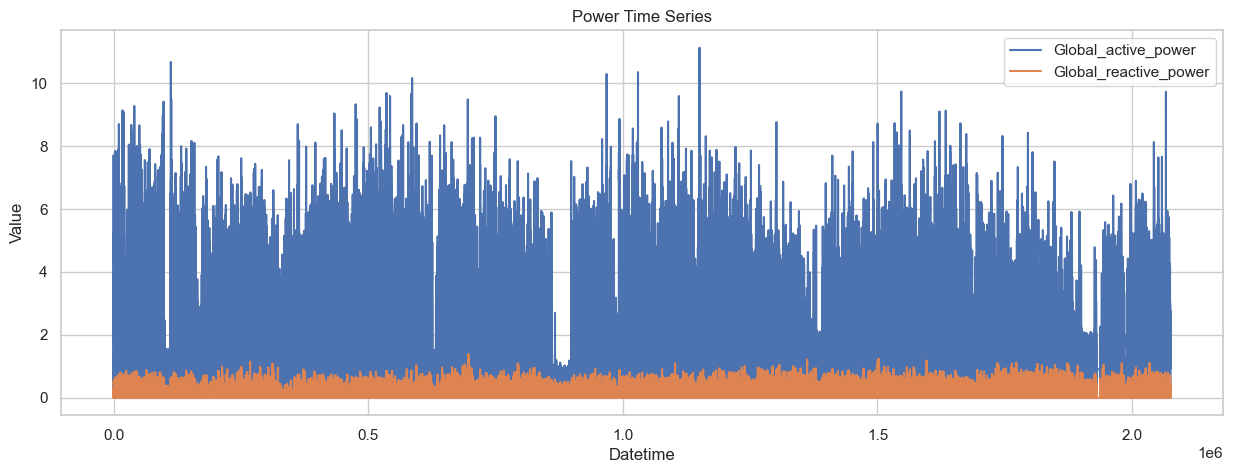

In [13]:
# Plot active/reactive power over time
plot_time_series(df, ['Global_active_power', 'Global_reactive_power'], "Power Time Series")

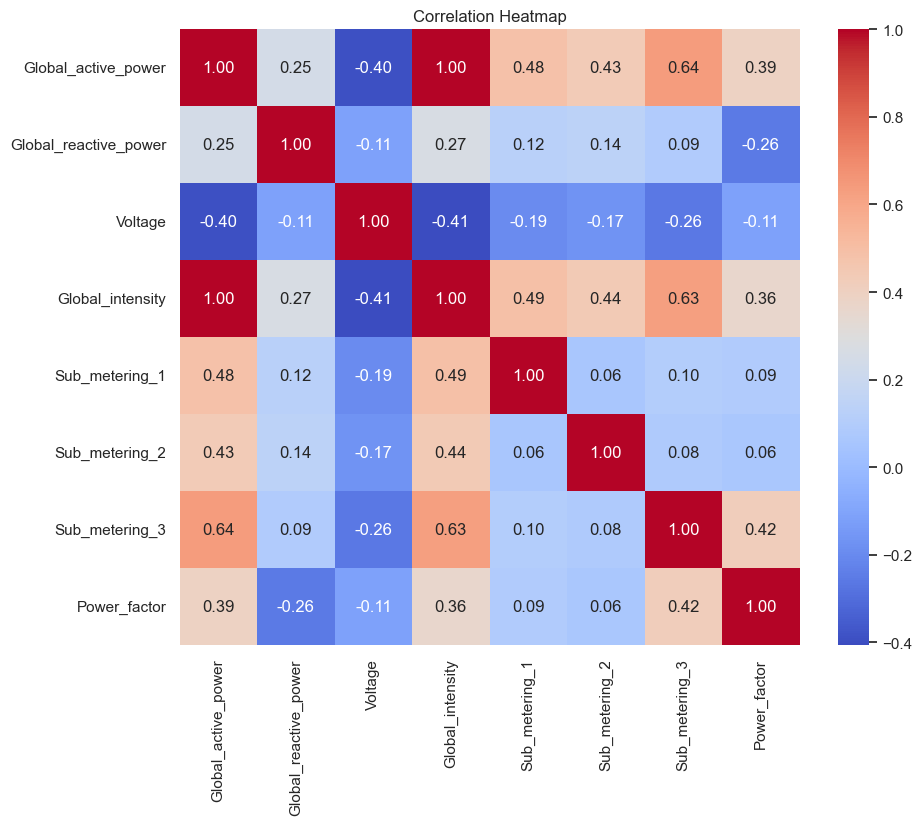

In [ ]:
# Correlation heatmap
columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
               'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Power_factor']
plot_correlation_heatmap(df, columns)

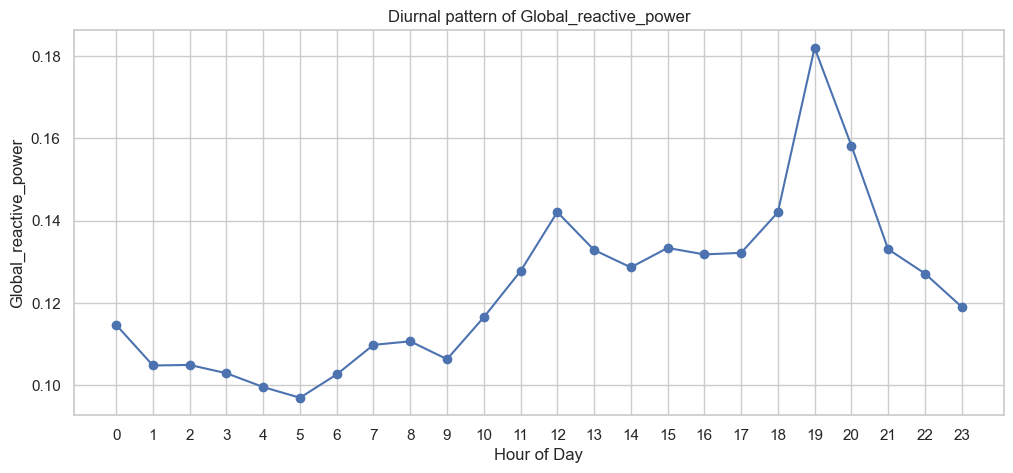

In [15]:
# Diurnal pattern of reactive power
plot_diurnal_pattern(df, 'Global_reactive_power')

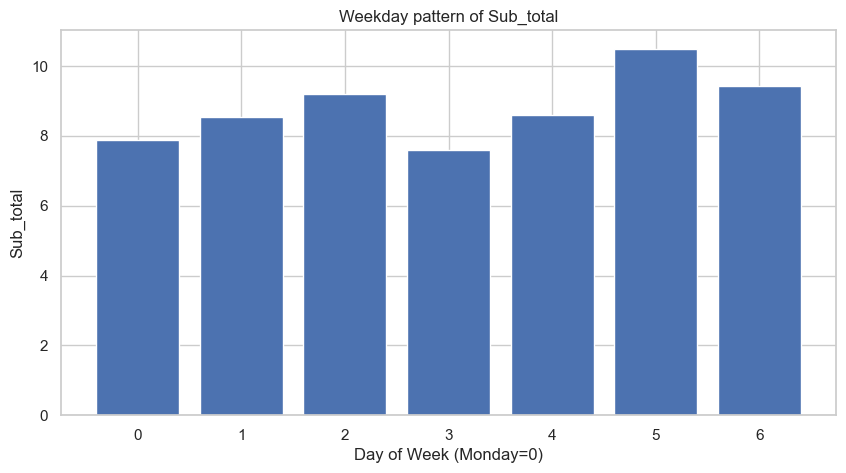

In [16]:
# Weekday pattern of total sub-metering
plot_weekday_pattern(df, 'Sub_total')

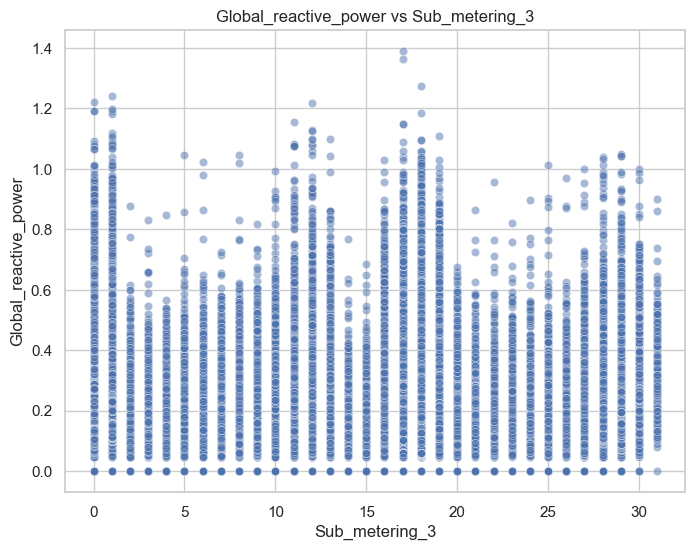

In [17]:
# Scatter plot of Sub3 vs Global_reactive_power
plot_scatter(df, 'Sub_metering_3', 'Global_reactive_power')